In [1]:
from metrics.evaluation import cross_validate_stratify, present_metrics, get_metrics
from visualizer.barchart import plot_bar_chart_comparison, plot_bar_chart
from sklearn import preprocessing
from sklearn.cross_validation import StratifiedShuffleSplit, StratifiedKFold
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

using it all together

In [2]:
label = pd.read_csv("data/dataset.csv")
labely = label.iloc[:, 13].values
sss = StratifiedShuffleSplit(labely, n_iter=1, test_size=0.4, random_state=0)

for train_index, test_index in sss:
    train_indices= train_index
    test_indices = test_index
skf = StratifiedKFold(labely[train_indices], n_folds=3)

# DATA SET INDIVIDUAL

In [3]:
# USING RBF KERNEL
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 45)].values)
y = df.iloc[:, 45].values
svm = SVC(class_weight='balanced')

resulti_all_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_all_rbf = resulti_all_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_all_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_all_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_all_rbf["matt_cross_val"])
print "GMEAN: " + str(resulti_all_rbf["gmean_cross_val"])
print ""
present_metrics(gmeani_all_rbf, "GMEAN")



CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.969168428471
MATTHEWS CORR COEF: 0.785953677618
GMEAN: 0.877187160928

####### TEST GMEAN #######
SENSITIVITY: 0.736842105263
SPECIFICITY: 0.931818181818
MATTHEWS CORR COEF: 0.655464300192
GMEAN: 0.828615031733


CONFUSION MATRIX
14	5
6	82


# DATA SET INDIVIDUAL NO VORONOI TESSELLATION

In [4]:
# USING RBF KERNEL
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 40)].values)
y = df.iloc[:, 45].values

svm = SVC(class_weight='balanced')

resulti_novoronoi_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_novoronoi_rbf = resulti_novoronoi_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_novoronoi_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_novoronoi_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_novoronoi_rbf["matt_cross_val"])
print "GMEAN: " + str(resulti_novoronoi_rbf["gmean_cross_val"])
print ""
present_metrics(gmeani_novoronoi_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.953840732911
MATTHEWS CORR COEF: 0.753453678438
GMEAN: 0.870636866192

####### TEST GMEAN #######
SENSITIVITY: 0.789473684211
SPECIFICITY: 0.931818181818
MATTHEWS CORR COEF: 0.69401730299
GMEAN: 0.857698043028


CONFUSION MATRIX
15	4
6	82


# DATA SET ALL MEAN

In [5]:
# USING RBF KERNEL
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 13)].values)
y = df.iloc[:, 13].values

svm = SVC(class_weight='balanced')

resultm_all_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_all_rbf = resultm_all_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_all_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_all_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_all_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_all_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_all_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.851851851852
SPECIFICITY: 0.922656800564
MATTHEWS CORR COEF: 0.724616376397
GMEAN: 0.881486099966

####### TEST GMEAN #######
SENSITIVITY: 0.842105263158
SPECIFICITY: 0.909090909091
MATTHEWS CORR COEF: 0.688219281399
GMEAN: 0.87495727852


CONFUSION MATRIX
16	3
8	80


# DATA SET ALL MEAN NO VORONOI

In [6]:
# USING RBF KERNEL
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 8)].values)
y = df.iloc[:, 13].values


svm = SVC(class_weight='balanced')

resultm_novoronoi_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_novoronoi_rbf = resultm_novoronoi_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_novoronoi_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_novoronoi_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_novoronoi_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_novoronoi_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_novoronoi_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.925925925926
SPECIFICITY: 0.900105708245
MATTHEWS CORR COEF: 0.735967450417
GMEAN: 0.911239590881

####### TEST GMEAN #######
SENSITIVITY: 0.894736842105
SPECIFICITY: 0.863636363636
MATTHEWS CORR COEF: 0.652010840824
GMEAN: 0.879049072992


CONFUSION MATRIX
17	2
12	76


# DATA SET ALL MEAN WITH FEATURE SELECTION

In [7]:
svm = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
                ('classification', SVC(class_weight='balanced'))])
        
result_FE = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

features = svm.named_steps['feature_selection'].get_support()

print "USED"
feat_i = [i for i, used in enumerate(features) if used]
unused_feat_i = [i for i, used in enumerate(features) if not used]
print [df.keys()[i] for i in feat_i]

print "UNUSED"
print [df.keys()[i] for i in unused_feat_i]
print ""

gmean_FE = result_FE["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(result_FE["sens_cross_val"])
print "SPECIFICITY: " + str(result_FE["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(result_FE["matt_cross_val"])
print "GMEAN: " + str(result_FE["gmean_cross_val"])
print ""
present_metrics(gmean_FE, "GMEAN")


USED
['distance', 'canonical distance', 'distance - canonical', 'entropy', 'distance from post', 'velocity defender', 'velocity offender']
UNUSED
['time defending']

CROSS VAL SCORES
SENSITIVITY: 0.925925925926
SPECIFICITY: 0.899929527837
MATTHEWS CORR COEF: 0.7358976968
GMEAN: 0.911141182035

####### TEST GMEAN #######
SENSITIVITY: 0.894736842105
SPECIFICITY: 0.875
MATTHEWS CORR COEF: 0.669218362646
GMEAN: 0.884813390971


CONFUSION MATRIX
17	2
11	77


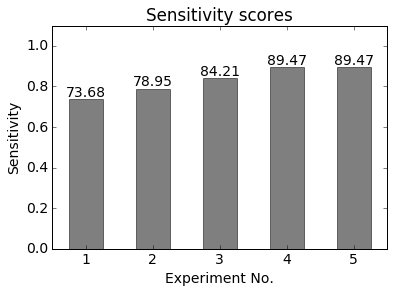

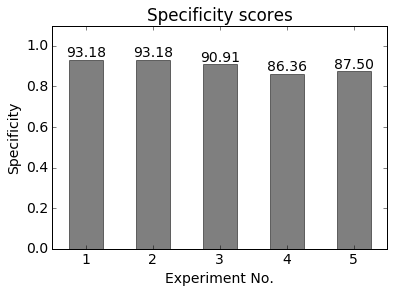

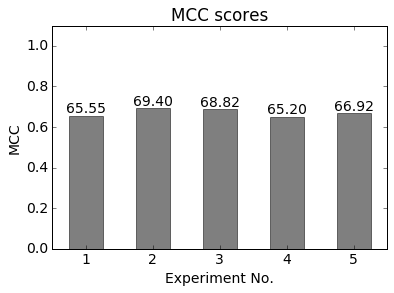

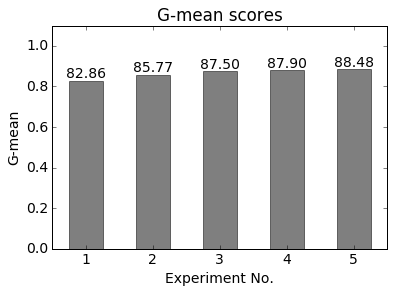

In [8]:
sensitivity_rbf = ([
gmeani_all_rbf[2][0],
gmeani_novoronoi_rbf[2][0],
gmeanm_all_rbf[2][0],
gmeanm_novoronoi_rbf[2][0],
gmean_FE[2][0]])

specificity_rbf =([
gmeani_all_rbf[2][1],
gmeani_novoronoi_rbf[2][1],
gmeanm_all_rbf[2][1],
gmeanm_novoronoi_rbf[2][1],
gmean_FE[2][1]
])

matthews_rbf = ([
gmeani_all_rbf[2][2],
gmeani_novoronoi_rbf[2][2],
gmeanm_all_rbf[2][2],
gmeanm_novoronoi_rbf[2][2],
gmean_FE[2][2]
])

gmean_rbf = ([
gmeani_all_rbf[2][3],
gmeani_novoronoi_rbf[2][3],
gmeanm_all_rbf[2][3],
gmeanm_novoronoi_rbf[2][3],
gmean_FE[2][3]
])

scores_rbf = [sensitivity_rbf, specificity_rbf, matthews_rbf, gmean_rbf]
labels = ["Sensitivity", "Specificity", "MCC", "G-mean"]

for score_rbf, label in zip(scores_rbf, labels):
    plot_bar_chart(label, ["1", "2", "3", "4", "5"], score_rbf)